Mean player vs Average Utility
-------------------------------

In [1]:
import opt_mo
import numpy as np
import axelrod as axl

In [2]:
import sympy as sym

In [3]:
import matplotlib.pyplot as plt
import matplotlib 

In [4]:
font = {'size'   : 15,
        'weight': 'bold'}
matplotlib.rc('font', **font)

**Purely Random**

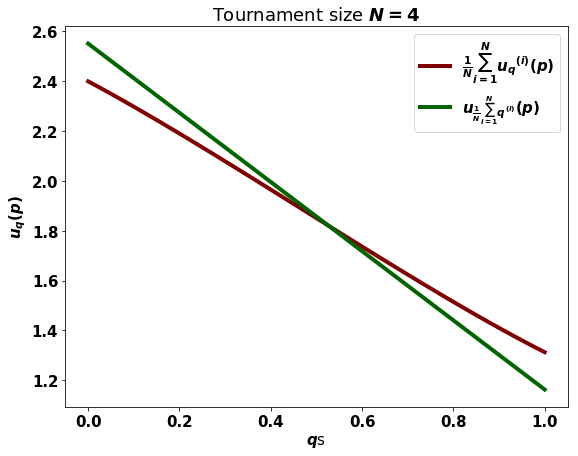

In [6]:
ps =  np.linspace(0, 1, 100)
for i in [9]:
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(4)]
    mean_player = [np.mean([opponents[i][j] for i in range(4)]) for j in range(4)] 
    
    plt.figure(figsize=(9, 7))
    average_utility = [-opt_mo.tournament_utility((p, p, p, p), opponents) for p in ps]
    average_opponent = [opt_mo.utility((p, p, p, p), mean_player) for p in ps]

    plt.plot(ps, average_utility, linestyle='-', color='maroon', linewidth=4,
             zorder=1, label=r'$\frac{1}{N} \sum_{i=1} ^ {N} {u_q}^{(i)} (p)$')
    plt.plot(ps, average_opponent, linestyle='-', linewidth=4, color='darkgreen', zorder=2,
               label=r'$u_{\frac {1}{N} \sum_{i=1} ^ N q^{(i)}}(p)$');
    plt.title('Tournament size $N=4$')
    plt.legend()
    
    plt.ylabel(r'$u_q(p)$')
    plt.xlabel(r'$q$s')
    
    plt.savefig('../img/mean_average/{}.png'.format(i), bbox_inches='tight');

**Reactive**

In [41]:
p_1, p_2 = sym.symbols('p_1, p_2')

In [42]:
p_one, p_two = np.linspace(0, 1, 50), np.linspace(0, 1, 50)

In [54]:
for i in [11]:
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(4)]
    mean_player = [np.mean([opponents[i][j] for i in range(4)]) for j in range(4)]
    
    av_utility = -opt_mo.tournament_utility((p_1, p_2, p_1, p_2), opponents)
    mn_utility = opt_mo.utility((p_1, p_2, p_1, p_2), mean_player)
    
    plt.figure(figsize=(9, 7))
    expr = sym.lambdify((p_1, p_2), abs(av_utility - mn_utility).simplify())

    X, Y = np.meshgrid(p_one, p_two)
    Z = expr(X, Y);
    
    plt.contourf(X, Y, Z);
    cbar = plt.colorbar();
    plt.title('Tournament size $N=4$')
    cbar.ax.get_yaxis().labelpad = 15
    cbar.set_label(r'$|\frac{1}{N} \sum_{i=1} ^ {N} {u_q}^{(i)} (p) - u_{\frac {1}{N} \sum_{i=1} ^ N q^{(i)}}(p)$|',
                   rotation=270, labelpad=+75, y=0.45)
    plt.tight_layout()
        
    plt.savefig('../img/mean_vs_average_two.png') #.format(i))
    plt.close();